In [ ]:
from IPython.display import clear_output
try:
  !pip install pystan
  !pip install fbprophet
except:
  print("Error installing facebook prophet")
finally:
  clear_output()
  print('Facebook Prophet was successfully installed')

Facebook Prophet was successfully installed


In [ ]:
price_per_acre_df= pd.read_csv("./national_price_per_acre.csv")
price_per_acre_df.head()

,year,price_per_acre
0,1970,196
1,1971,203
2,1972,219
3,1973,246
4,1974,302


In [ ]:
# Rename the columns to the Prophet model syntax 
price_per_acre_df = price_per_acre_df.rename(columns={"year":"ds", "price_per_acre":"y"})

# Review the Canada DataFrame
price_per_acre_df.tail()

,ds,y
46,2016,2990
47,2017,3030
48,2018,3100
49,2019,3160
50,2020,3160


In [ ]:
# Creating a Prophet model for the price prediction
model = Prophet()

In [ ]:
# Fitting the Prophet model
model.fit(price_per_acre_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Forecast 50 years of yearly future trends data 
future_farmland_prices = model.make_future_dataframe(periods=100, freq="Y")

# Display the last five rows of the future_farmland_prices DataFrame
future_farmland_prices.tail()

,ds
146,2065-12-31 00:00:00.000002020
147,2066-12-31 00:00:00.000002020
148,2067-12-31 00:00:00.000002020
149,2068-12-31 00:00:00.000002020
150,2069-12-31 00:00:00.000002020


In [ ]:
# Making predictions using the future_farmland_prices DataFrame
forecast_farmland_prices = model.predict(future_farmland_prices)

# Display the first five rows of the forecast_canada DataFrame
forecast_farmland_prices.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01 00:00:00.000001970,-4.575726,106.823938,431.518048,-4.575726,-4.575726,273.822019,273.822019,273.822019,273.822019,273.822019,273.822019,0.0,0.0,0.0,269.246292
1,1970-01-01 00:00:00.000001971,-4.575726,113.588161,422.307297,-4.575726,-4.575726,273.822019,273.822019,273.822019,273.822019,273.822019,273.822019,0.0,0.0,0.0,269.246292
2,1970-01-01 00:00:00.000001972,-4.575726,117.930471,424.233524,-4.575726,-4.575726,273.822019,273.822019,273.822019,273.822019,273.822019,273.822019,0.0,0.0,0.0,269.246292
3,1970-01-01 00:00:00.000001973,-4.575726,123.574810,423.533585,-4.575726,-4.575726,273.822019,273.822019,273.822019,273.822019,273.822019,273.822019,0.0,0.0,0.0,269.246292
4,1970-01-01 00:00:00.000001974,-4.575726,107.252013,422.074724,-4.575726,-4.575726,273.822019,273.822019,273.822019,273.822019,273.822019,273.822019,0.0,0.0,0.0,269.246292


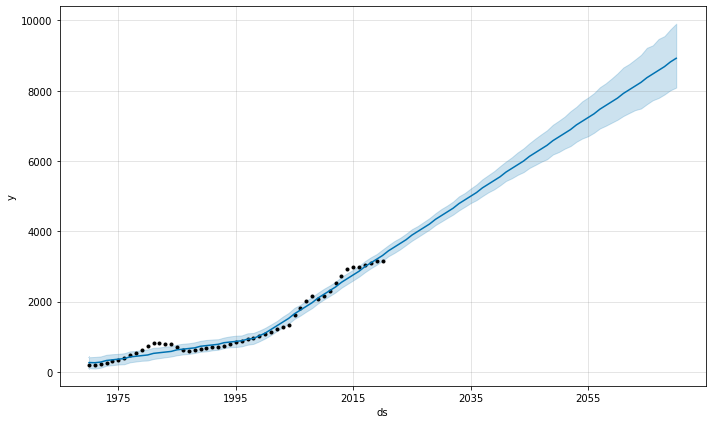

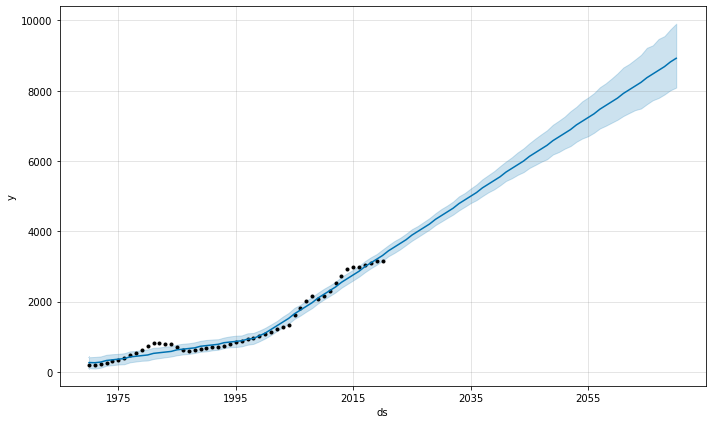

In [ ]:
# Ploting the Prophet predictions  
model.plot(forecast_farmland_prices)

In [ ]:
# Setting the index in the forecast_canada DataFrame to the ds datetime column 
forecast_farmland_prices = forecast_farmland_prices.set_index('ds')

# Display the forecast_canada DataFrame
forecast_farmland_prices.head()



,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000001970,-4.575726,106.823938,431.518048,-4.575726,-4.575726,273.822019,273.822019,273.822019,273.822019,273.822019,273.822019,0.0,0.0,0.0,269.246292
1970-01-01 00:00:00.000001971,-4.575726,113.588161,422.307297,-4.575726,-4.575726,273.822019,273.822019,273.822019,273.822019,273.822019,273.822019,0.0,0.0,0.0,269.246292
1970-01-01 00:00:00.000001972,-4.575726,117.930471,424.233524,-4.575726,-4.575726,273.822019,273.822019,273.822019,273.822019,273.822019,273.822019,0.0,0.0,0.0,269.246292
1970-01-01 00:00:00.000001973,-4.575726,123.574810,423.533585,-4.575726,-4.575726,273.822019,273.822019,273.822019,273.822019,273.822019,273.822019,0.0,0.0,0.0,269.246292
1970-01-01 00:00:00.000001974,-4.575726,107.252013,422.074724,-4.575726,-4.575726,273.822019,273.822019,273.822019,273.822019,273.822019,273.822019,0.0,0.0,0.0,269.246292


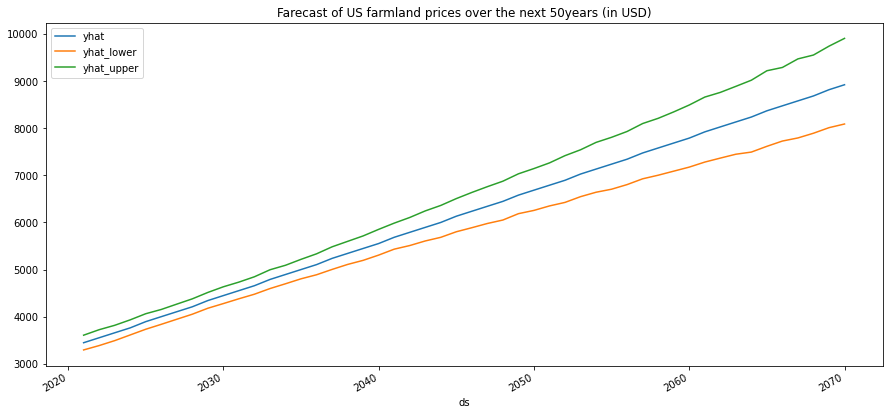

In [ ]:
# Plot predictions for our forecast_canada DataFrame for the 50 year period 
forecast_farmland_prices[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-50:,:].plot(figsize= (15,7),title= "Farecast of US farmland prices over the next 50years (in USD)" )




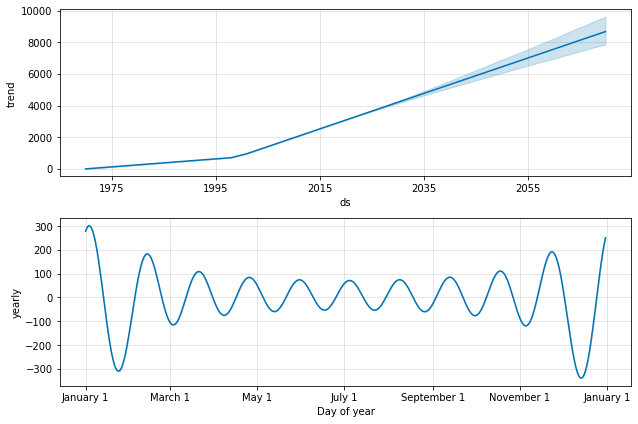

In [ ]:
# Reseting the index in the forecast_farmland_prices DataFrame
forecast_farmland_prices = forecast_farmland_prices.reset_index()

# Using the plot_components function to visualize the forecast results 

fig = model.plot_components(forecast_farmland_prices)